In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Import Helper
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [87]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
data_dir = "gdrive/My Drive/deeplearning/20200106 Brain Tumor Classification/data/1_raw/"
processed_dir = "gdrive/My Drive/deeplearning/20200106 Brain Tumor Classification/data/2_processed/"


In [89]:
!pip install split_folders
import split_folders

split_folders.ratio(data_dir, output=processed_dir, seed=1337, ratio=(.8, .2))

Copying files: 253 files [00:04, 62.73 files/s]


In [0]:
train_dir = os.path.join(processed_dir, 'train')
validation_dir = os.path.join(processed_dir, 'val')

In [0]:
train_yes_dir = os.path.join(train_dir, 'yes')
train_no_dir = os.path.join(train_dir, 'no')

validation_yes_dir = os.path.join(validation_dir, 'yes')
validation_no_dir = os.path.join(validation_dir, 'no')

In [0]:
num_yes_tr = len(os.listdir(train_yes_dir))
num_no_tr = len(os.listdir(train_no_dir))
num_yes_val = len(os.listdir(validation_yes_dir))
num_no_val = len(os.listdir(validation_no_dir))


total_train = num_yes_tr + num_no_tr
total_val = num_yes_val + num_no_val

In [93]:
print('total training tumor images:', num_yes_tr)
print('total training not tumor images:', num_no_tr)

print('total validation tumor images:', num_yes_val)
print('total validation not tumor images:', num_no_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training tumor images: 124
total training not tumor images: 78
total validation tumor images: 31
total validation not tumor images: 20
--
Total training images: 202
Total validation images: 51


## Data Preparation

In [0]:
batch_size = 32
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [0]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

In [108]:
train_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

Found 202 images belonging to 2 classes.


In [109]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=train_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')


val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 202 images belonging to 2 classes.
Found 51 images belonging to 2 classes.


## Visualize Training Images

In [0]:
sample_training_images, _ = next(train_data_gen)


In [0]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

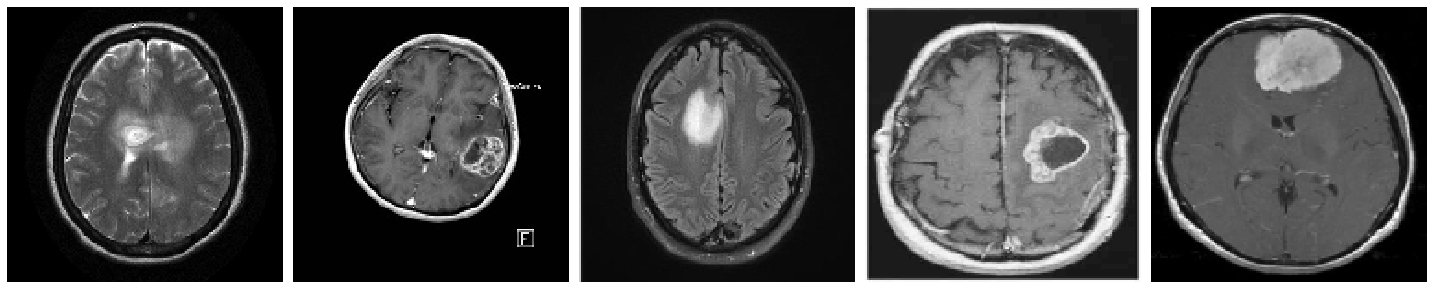

In [112]:
plotImages(sample_training_images[:5])


## Create Model

In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [115]:
model.summary()


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 15, 15, 128)      

## Train Model

In [116]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/15
6/6 [==============================] - 2s 276ms/step - loss: 0.6634 - acc: 0.6000 - val_loss: 0.8110 - val_acc: 0.5625
Epoch 2/15
6/6 [==============================] - 1s 188ms/step - loss: 0.6400 - acc: 0.7240 - val_loss: 0.6060 - val_acc: 0.7500
Epoch 3/15
6/6 [==============================] - 1s 153ms/step - loss: 0.5200 - acc: 0.8176 - val_loss: 0.5243 - val_acc: 0.7188
Epoch 4/15
6/6 [==============================] - 1s 179ms/step - loss: 0.5104 - acc: 0.7812 - val_loss: 0.5413 - val_acc: 0.6875
Epoch 5/15
6/6 [==============================] - 1s 148ms/step - loss: 0.5241 - acc: 0.7765 - val_loss: 0.5303 - val_acc: 0.8438
Epoch 6/15
6/6 [==============================] - 1s 140ms/step - loss: 0.4866 - acc: 0.8108 - val_loss: 0.5194 - val_acc: 0.6875
Epoch 7/15
6/6 [==============================] - 1s 152ms/step - loss: 0.4222 - acc: 0.8333 - val_loss: 0.4896 - val_acc: 0.8125
Epoch 8/15
6/6 [==============================] - 1s 168ms/step - loss: 0.3973 - acc: 0.83

## Visualize training results

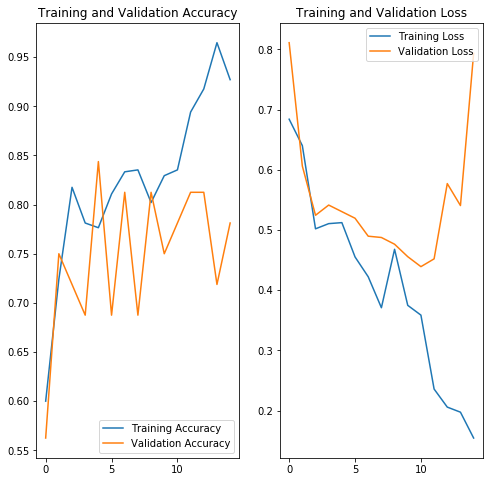

In [117]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

As you can see from the plots, training accuracy and validation accuracy are off by large margin and the model has achieved only around 85% accuracy on the validation set.

Let's look at what went wrong and try to increase overall performance of the model.